Refactored

In [65]:
import pandas as pd
import pandas_ta as ta
from tqdm import tqdm
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime
from backtesting import Strategy
from backtesting import Backtest
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


tqdm.pandas()

tradingData = pd.read_csv("../data/^ixic-6mo-1h.csv")
tradingData.Datetime = pd.to_datetime(tradingData.Datetime, utc=True)
tradingData=tradingData[tradingData.High != tradingData.Low]
tradingData.set_index('Datetime', inplace=True)
tradingData.drop(['Dividends', 'Stock Splits', 'Volume'], axis=1, inplace=True)
tradingData

Open          High           Low  \
Datetime                                                              
2023-10-18 13:30:00+00:00  13439.915039  13499.502930  13421.323242   
2023-10-18 14:30:00+00:00  13448.098633  13448.301758  13386.589844   
2023-10-18 15:30:00+00:00  13415.466797  13447.771484  13394.423828   
2023-10-18 16:30:00+00:00  13397.604492  13439.089844  13359.598633   
2023-10-18 17:30:00+00:00  13419.489258  13419.581055  13355.813477   
...                                 ...           ...           ...   
2024-04-17 15:30:00+00:00  15783.606445  15783.606445  15705.765625   
2024-04-17 16:30:00+00:00  15713.811523  15741.323242  15654.822266   
2024-04-17 17:30:00+00:00  15744.334961  15773.291016  15731.041992   
2024-04-17 18:30:00+00:00  15749.591797  15814.849609  15689.807617   
2024-04-17 19:30:00+00:00  15691.283203  15733.230469  15682.182617   

                                  Close  
Datetime                                 
2023-10-18 13:30:00+00:00  13451.814453  
2023-10-18 14:30:00+00:00  13415.507812  
2023-10-18 15:30:00+00:00  13398.106445  
2023-10-18 16:30:00+00:00  13418.132812  
2023-10-18 17:30:00+00:00  13379.012695  
...                                 ...  
2024-04-17 15:30:00+00:00  15715.237305  
2024-04-17 16:30:00+00:00  15741.280273  
2024-04-17 17:30:00+00:00  15748.874023  
2024-04-17 18:30:00+00:00  15689.807617  
2024-04-17 19:30:00+00:00  15683.372070  

[871 rows x 4 columns]

In [66]:
tradingData['EMA'] = ta.ema(tradingData.Close, length=400)
macd = ta.macd(tradingData.Close)
macd

tradingData['MACD'] = macd.loc[:, 'MACD_12_26_9']
tradingData['MACD_signal'] = macd.loc[:, 'MACDs_12_26_9']
tradingData['MACD_histogram'] = macd.loc[:, 'MACDh_12_26_9']
tradingData['ATR'] = ta.atr(tradingData.High, tradingData.Low, tradingData.Close, length=7)
tradingData

Open          High           Low  \
Datetime                                                              
2023-10-18 13:30:00+00:00  13439.915039  13499.502930  13421.323242   
2023-10-18 14:30:00+00:00  13448.098633  13448.301758  13386.589844   
2023-10-18 15:30:00+00:00  13415.466797  13447.771484  13394.423828   
2023-10-18 16:30:00+00:00  13397.604492  13439.089844  13359.598633   
2023-10-18 17:30:00+00:00  13419.489258  13419.581055  13355.813477   
...                                 ...           ...           ...   
2024-04-17 15:30:00+00:00  15783.606445  15783.606445  15705.765625   
2024-04-17 16:30:00+00:00  15713.811523  15741.323242  15654.822266   
2024-04-17 17:30:00+00:00  15744.334961  15773.291016  15731.041992   
2024-04-17 18:30:00+00:00  15749.591797  15814.849609  15689.807617   
2024-04-17 19:30:00+00:00  15691.283203  15733.230469  15682.182617   

                                  Close           EMA        MACD  \
Datetime                                                            
2023-10-18 13:30:00+00:00  13451.814453           NaN         NaN   
2023-10-18 14:30:00+00:00  13415.507812           NaN         NaN   
2023-10-18 15:30:00+00:00  13398.106445           NaN         NaN   
2023-10-18 16:30:00+00:00  13418.132812           NaN         NaN   
2023-10-18 17:30:00+00:00  13379.012695           NaN         NaN   
...                                 ...           ...         ...   
2024-04-17 15:30:00+00:00  15715.237305  15884.015792 -105.568474   
2024-04-17 16:30:00+00:00  15741.280273  15883.303894 -108.684552   
2024-04-17 17:30:00+00:00  15748.874023  15882.633421 -109.281584   
2024-04-17 18:30:00+00:00  15689.807617  15881.671696 -113.215820   
2024-04-17 19:30:00+00:00  15683.372070  15880.682670 -115.521367   

                           MACD_signal  MACD_histogram        ATR  
Datetime                                                           
2023-10-18 13:30:00+00:00          NaN             NaN        NaN  
2023-10-18 14:30:00+00:00          NaN             NaN        NaN  
2023-10-18 15:30:00+00:00          NaN             NaN        NaN  
2023-10-18 16:30:00+00:00          NaN             NaN        NaN  
2023-10-18 17:30:00+00:00          NaN             NaN        NaN  
...                                ...             ...        ...  
2024-04-17 15:30:00+00:00   -93.078959      -12.489515  87.330969  
2024-04-17 16:30:00+00:00   -96.200078      -12.484475  87.212398  
2024-04-17 17:30:00+00:00   -98.816379      -10.465205  80.789059  
2024-04-17 18:30:00+00:00  -101.696267      -11.519553  87.110907  
2024-04-17 19:30:00+00:00  -104.461287      -11.060080  81.959042  

[871 rows x 9 columns]

In [67]:
def ema_signal(df, current, go_back_number):
  df_slice = df.copy()
  start = max(0, current - go_back_number)
  end = current
  relevant_rows = df_slice.iloc[start:end]

  if all(relevant_rows['High'] < relevant_rows['EMA']):
    return 'downtrend'
  elif all(relevant_rows['Low'] > relevant_rows['EMA']):
    return 'uptrend'
  else:
    return 'neutral'

tradingData.reset_index(inplace=True)
tradingData['EMASignal'] = tradingData.progress_apply(
  lambda row: ema_signal(tradingData, row.name, 5), axis='columns')
tradingData

100%|██████████| 871/871 [00:00<00:00, 7175.21it/s]


Datetime          Open          High           Low  \
0   2023-10-18 13:30:00+00:00  13439.915039  13499.502930  13421.323242   
1   2023-10-18 14:30:00+00:00  13448.098633  13448.301758  13386.589844   
2   2023-10-18 15:30:00+00:00  13415.466797  13447.771484  13394.423828   
3   2023-10-18 16:30:00+00:00  13397.604492  13439.089844  13359.598633   
4   2023-10-18 17:30:00+00:00  13419.489258  13419.581055  13355.813477   
..                        ...           ...           ...           ...   
866 2024-04-17 15:30:00+00:00  15783.606445  15783.606445  15705.765625   
867 2024-04-17 16:30:00+00:00  15713.811523  15741.323242  15654.822266   
868 2024-04-17 17:30:00+00:00  15744.334961  15773.291016  15731.041992   
869 2024-04-17 18:30:00+00:00  15749.591797  15814.849609  15689.807617   
870 2024-04-17 19:30:00+00:00  15691.283203  15733.230469  15682.182617   

            Close           EMA        MACD  MACD_signal  MACD_histogram  \
0    13451.814453           NaN         NaN          NaN             NaN   
1    13415.507812           NaN         NaN          NaN             NaN   
2    13398.106445           NaN         NaN          NaN             NaN   
3    13418.132812           NaN         NaN          NaN             NaN   
4    13379.012695           NaN         NaN          NaN             NaN   
..            ...           ...         ...          ...             ...   
866  15715.237305  15884.015792 -105.568474   -93.078959      -12.489515   
867  15741.280273  15883.303894 -108.684552   -96.200078      -12.484475   
868  15748.874023  15882.633421 -109.281584   -98.816379      -10.465205   
869  15689.807617  15881.671696 -113.215820  -101.696267      -11.519553   
870  15683.372070  15880.682670 -115.521367  -104.461287      -11.060080   

           ATR  EMASignal  
0          NaN  downtrend  
1          NaN    neutral  
2          NaN    neutral  
3          NaN    neutral  
4          NaN    neutral  
..         ...        ...  
866  87.330969    neutral  
867  87.212398    neutral  
868  80.789059    neutral  
869  87.110907    neutral  
870  81.959042  downtrend  

[871 rows x 11 columns]

In [68]:
def total_signal(df, current, go_back_number):
    if (ema_signal(df, current, go_back_number) == 'uptrend' and
        all(df.loc[current - 3:current - 2, 'MACD'] < df.loc[current - 3:current - 2, 'MACD_signal']) and
        all(df.loc[current - 1:current, 'MACD'] > df.loc[current - 1:current, 'MACD_signal'])
        ):
            return 1
    if (ema_signal(df, current, go_back_number)==1 and
        all(df.loc[current - 3:current - 2, 'MACD'] > df.loc[current - 3:current - 2, 'MACD_signal']) and
        all(df.loc[current - 1:current, 'MACD'] < df.loc[current - 1:current, 'MACD_signal'])
        ):

            return -1
    return 0

tradingData['TotalSignal'] = tradingData.progress_apply(
       lambda row: total_signal(tradingData, row.name, 7), axis='columns')
tradingData

100%|██████████| 871/871 [00:00<00:00, 2339.19it/s]


Datetime          Open          High           Low  \
0   2023-10-18 13:30:00+00:00  13439.915039  13499.502930  13421.323242   
1   2023-10-18 14:30:00+00:00  13448.098633  13448.301758  13386.589844   
2   2023-10-18 15:30:00+00:00  13415.466797  13447.771484  13394.423828   
3   2023-10-18 16:30:00+00:00  13397.604492  13439.089844  13359.598633   
4   2023-10-18 17:30:00+00:00  13419.489258  13419.581055  13355.813477   
..                        ...           ...           ...           ...   
866 2024-04-17 15:30:00+00:00  15783.606445  15783.606445  15705.765625   
867 2024-04-17 16:30:00+00:00  15713.811523  15741.323242  15654.822266   
868 2024-04-17 17:30:00+00:00  15744.334961  15773.291016  15731.041992   
869 2024-04-17 18:30:00+00:00  15749.591797  15814.849609  15689.807617   
870 2024-04-17 19:30:00+00:00  15691.283203  15733.230469  15682.182617   

            Close           EMA        MACD  MACD_signal  MACD_histogram  \
0    13451.814453           NaN         NaN          NaN             NaN   
1    13415.507812           NaN         NaN          NaN             NaN   
2    13398.106445           NaN         NaN          NaN             NaN   
3    13418.132812           NaN         NaN          NaN             NaN   
4    13379.012695           NaN         NaN          NaN             NaN   
..            ...           ...         ...          ...             ...   
866  15715.237305  15884.015792 -105.568474   -93.078959      -12.489515   
867  15741.280273  15883.303894 -108.684552   -96.200078      -12.484475   
868  15748.874023  15882.633421 -109.281584   -98.816379      -10.465205   
869  15689.807617  15881.671696 -113.215820  -101.696267      -11.519553   
870  15683.372070  15880.682670 -115.521367  -104.461287      -11.060080   

           ATR  EMASignal  TotalSignal  
0          NaN  downtrend            0  
1          NaN    neutral            0  
2          NaN    neutral            0  
3          NaN    neutral            0  
4          NaN    neutral            0  
..         ...        ...          ...  
866  87.330969    neutral            0  
867  87.212398    neutral            0  
868  80.789059    neutral            0  
869  87.110907    neutral            0  
870  81.959042  downtrend            0  

[871 rows x 12 columns]

In [69]:
tradingData[tradingData.TotalSignal != 0].head(20)

Datetime          Open          High           Low  \
432 2024-01-18 16:30:00+00:00  15039.760742  15047.292969  14960.068359   
459 2024-01-24 15:30:00+00:00  15577.142578  15613.206055  15552.051758   
485 2024-01-29 20:30:00+00:00  15620.563477  15629.439453  15603.919922   
506 2024-02-01 20:30:00+00:00  15359.461914  15372.059570  15330.623047   
529 2024-02-07 15:30:00+00:00  15756.551758  15756.551758  15706.692383   
570 2024-02-15 14:30:00+00:00  15872.697266  15882.257812  15808.068359   
599 2024-02-22 15:30:00+00:00  15958.065430  15972.327148  15912.490234   
639 2024-02-29 20:30:00+00:00  16054.853516  16115.252930  16051.454102   
665 2024-03-06 18:30:00+00:00  16119.707031  16121.794922  16004.592773   
669 2024-03-07 15:30:00+00:00  16202.995117  16242.939453  16185.500977   
691 2024-03-12 15:30:00+00:00  16250.869141  16251.669922  16183.899414   
718 2024-03-18 14:30:00+00:00  16242.105469  16244.125000  16177.679688   
728 2024-03-19 17:30:00+00:00  16146.315430  16172.199219  16137.277344   
776 2024-03-28 16:30:00+00:00  16393.414062  16393.810547  16367.224609   
796 2024-04-03 15:30:00+00:00  16336.006836  16340.727539  16285.194336   
816 2024-04-08 14:30:00+00:00  16293.958008  16323.583984  16291.982422   
828 2024-04-09 19:30:00+00:00  16273.162109  16309.097656  16248.305664   
838 2024-04-11 15:30:00+00:00  16219.844727  16294.975586  16219.333008   

            Close           EMA        MACD  MACD_signal  MACD_histogram  \
432  14981.042969  14224.528268   11.067628    -2.786692       13.854319   
459  15567.727539  14360.617070  109.554103   102.583619        6.970484   
485  15629.024414  14501.623314   41.868532    35.347381        6.521150   
506  15361.317383  14587.805870  -41.584241   -49.012341        7.428100   
529  15719.308594  14697.268943   51.970463    42.107081        9.863382   
570  15821.536133  14906.961940   -5.990393   -14.005402        8.015009   
599  15952.594727  15015.570005   -9.376224   -52.326147       42.949924   
639  16088.887695  15195.599754   26.463331    21.056784        5.406546   
665  16060.756836  15308.587345  -14.963953   -16.948895        1.984942   
669  16241.905273  15324.681309   10.660074    -9.349133       20.009208   
691  16189.815430  15411.460674    0.565832    -8.725357        9.291189   
718  16192.213867  15501.680278  -16.618794   -29.006912       12.388119   
728  16161.052734  15531.691121    0.599799    -6.742285        7.342084   
776  16372.154297  15711.058229    2.386629     2.256349        0.130280   
796  16320.144531  15767.911391  -23.141669   -29.350666        6.208997   
816  16295.976562  15816.439328  -13.107379   -19.382081        6.274702   
828  16308.320312  15841.919248   -5.466086   -11.232815        5.766730   
838  16276.214844  15858.088361  -15.819426   -23.721637        7.902212   

            ATR EMASignal  TotalSignal  
432   76.591306   uptrend            1  
459   57.744351   uptrend            1  
485   43.253926   uptrend            1  
506   73.264526   uptrend            1  
529   66.799304   uptrend            1  
570   74.011490   uptrend            1  
599  109.738694   uptrend            1  
639   55.459583   uptrend            1  
665   80.701710   uptrend            1  
669   85.871102   uptrend            1  
691   82.643377   uptrend            1  
718   93.100313   uptrend            1  
728   71.035658   uptrend            1  
776   45.766520   uptrend            1  
796   60.053933   uptrend            1  
816   70.655188   uptrend            1  
828   65.515479   uptrend            1  
838   77.597673   uptrend            1

In [70]:
def pointpos(x):
    if x['TotalSignal'] == 1:
        return x['Low']-1e-3
    elif x['TotalSignal'] == -1:
        return x['High']+1e-3
    else:
        return np.nan

tradingData['pointpos'] = tradingData.apply(lambda row: pointpos(row), axis='columns')

In [71]:
st=1100
dfpl = tradingData
#dfpl.reset_index(inplace=True)
fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['Open'],
                high=dfpl['High'],
                low=dfpl['Low'],
                close=dfpl['Close'])])

fig.add_scatter(x=dfpl.index, y=dfpl['pointpos'], mode="markers",
                marker=dict(size=5, color="MediumPurple"),
                name="entry")

# fig.show(renderer="browser")
fig.show()

In [72]:
tradingData

Datetime          Open          High           Low  \
0   2023-10-18 13:30:00+00:00  13439.915039  13499.502930  13421.323242   
1   2023-10-18 14:30:00+00:00  13448.098633  13448.301758  13386.589844   
2   2023-10-18 15:30:00+00:00  13415.466797  13447.771484  13394.423828   
3   2023-10-18 16:30:00+00:00  13397.604492  13439.089844  13359.598633   
4   2023-10-18 17:30:00+00:00  13419.489258  13419.581055  13355.813477   
..                        ...           ...           ...           ...   
866 2024-04-17 15:30:00+00:00  15783.606445  15783.606445  15705.765625   
867 2024-04-17 16:30:00+00:00  15713.811523  15741.323242  15654.822266   
868 2024-04-17 17:30:00+00:00  15744.334961  15773.291016  15731.041992   
869 2024-04-17 18:30:00+00:00  15749.591797  15814.849609  15689.807617   
870 2024-04-17 19:30:00+00:00  15691.283203  15733.230469  15682.182617   

            Close           EMA        MACD  MACD_signal  MACD_histogram  \
0    13451.814453           NaN         NaN          NaN             NaN   
1    13415.507812           NaN         NaN          NaN             NaN   
2    13398.106445           NaN         NaN          NaN             NaN   
3    13418.132812           NaN         NaN          NaN             NaN   
4    13379.012695           NaN         NaN          NaN             NaN   
..            ...           ...         ...          ...             ...   
866  15715.237305  15884.015792 -105.568474   -93.078959      -12.489515   
867  15741.280273  15883.303894 -108.684552   -96.200078      -12.484475   
868  15748.874023  15882.633421 -109.281584   -98.816379      -10.465205   
869  15689.807617  15881.671696 -113.215820  -101.696267      -11.519553   
870  15683.372070  15880.682670 -115.521367  -104.461287      -11.060080   

           ATR  EMASignal  TotalSignal  pointpos  
0          NaN  downtrend            0       NaN  
1          NaN    neutral            0       NaN  
2          NaN    neutral            0       NaN  
3          NaN    neutral            0       NaN  
4          NaN    neutral            0       NaN  
..         ...        ...          ...       ...  
866  87.330969    neutral            0       NaN  
867  87.212398    neutral            0       NaN  
868  80.789059    neutral            0       NaN  
869  87.110907    neutral            0       NaN  
870  81.959042  downtrend            0       NaN  

[871 rows x 13 columns]

In [73]:
dfopt = tradingData[:]
def SIGNAL():
    return dfopt.TotalSignal

In [63]:
class MyStrat(Strategy):
    mysize = 3
    slcoef = 1.1
    TPSLRatio = 1.5
    #rsi_length = 16

    def init(self):
        super().init()
        self.signal1 = self.I(SIGNAL)
        #df['RSI']=ta.rsi(df.Close, length=self.rsi_length)

    def next(self):
        super().next()
        slatr = self.slcoef * self.data.ATR[-1]
        TPSLRatio = self.TPSLRatio

        # if len(self.trades)>0:
        #     if self.trades[-1].is_long and self.data.RSI[-1]>=90:
        #         self.trades[-1].close()
        #     elif self.trades[-1].is_short and self.data.RSI[-1]<=10:
        #         self.trades[-1].close()

        if self.signal1 == 1 and len(self.trades)==0:
            sl1 = self.data.Close[-1] - slatr
            tp1 = self.data.Close[-1] + slatr * TPSLRatio
            self.buy(sl=sl1, tp=tp1, size=self.mysize)

        elif self.signal1 == -1 and len(self.trades)==0:
            sl1 = self.data.Close[-1] + slatr
            tp1 = self.data.Close[-1] - slatr*TPSLRatio
            self.sell(sl=sl1, tp=tp1, size=self.mysize)

bt = Backtest(dfopt, MyStrat, cash=25000, margin=1/30, commission=0.00)
stats, heatmap = bt.optimize(slcoef=[i/10 for i in range(10, 26)],
                    TPSLRatio=[i/10 for i in range(10, 26)],
                    #rsi_length=[5, 8, 10, 12, 14, 16],
                    maximize='Return [%]', max_tries=300,
                        random_state=0,
                        return_heatmap=True)
stats

/var/folders/rk/xympl3kj42nf5b5zvnt_lrxh0000gn/T/ipykernel_50492/1270309982.py:33: UserWarning:

Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.

/Users/andrew/.pyenv/versions/3.11.4/lib/python3.11/site-packages/backtesting/backtesting.py:1375: UserWarning:

For multiprocessing support in `Backtest.optimize()` set multiprocessing start method to 'fork'.



  0%|          | 0/8 [00:00<?, ?it/s]

Start                                     0.0
End                                     870.0
Duration                                870.0
Exposure Time [%]                   21.239954
Equity Final [$]                 28068.934691
Equity Peak [$]                  28068.934691
Return [%]                          12.275739
Buy & Hold Return [%]               16.589268
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     NaN
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              0.0
Max. Drawdown [%]                    -4.57779
Avg. Drawdown [%]                    -0.95608
Max. Drawdown Duration                  145.0
Avg. Drawdown Duration                22.5625
# Trades                                 20.0
Win Rate [%]                             60.0
Best Trade [%]                       1.479557
Worst Trade [%]                      -1.03559
Avg. Trade [%]                    

In [42]:
stats["_strategy"]
trade_log = stats["_trades"]
trade_log

Size  EntryBar  ExitBar    EntryPrice     ExitPrice         PnL  \
0      3       217      220  14276.063477  14170.840820 -315.667969   
1      3       229      248  14219.260742  14369.504099  450.730071   
2      3       260      267  14428.028320  14526.244459  294.648415   
3      3       321      339  15005.351562  15145.951172  421.798828   
4      3       341      347  15120.338867  15069.098029 -153.722514   
5      3       433      438  14981.167969  15152.607494  514.318575   
6      3       460      463  15569.273438  15486.885447 -247.163971   
7      3       486      487  15607.348633  15568.468917 -116.639147   
8      3       507      508  15404.483398  15525.429922  362.839571   
9      3       530      542  15722.115234  15868.939035  440.471402   
10     3       571      584  15825.860352  15684.290039 -424.710938   
11     3       640      642  16117.473633  16213.117161  286.930584   
12     3       666      669  16064.772461  16241.528666  530.268614   
13     3       670      675  16237.709961  16434.256542  589.639744   
14     3       692      708  16189.819336  16074.114702 -347.113903   
15     3       719      724  16192.319336  16028.371094 -491.844727   
16     3       729      736  16160.485352  16320.172609  479.061772   
17     3       777      780  16372.086914  16474.671301  307.753161   
18     3       797      803  16319.100586  16454.665341  406.694265   
19     3       817      823  16294.114258  16197.059299 -291.164877   

    ReturnPct  EntryTime  ExitTime  Duration  
0   -0.007371        217       220         3  
1    0.010566        229       248        19  
2    0.006807        260       267         7  
3    0.009370        321       339        18  
4   -0.003389        341       347         6  
5    0.011444        433       438         5  
6   -0.005292        460       463         3  
7   -0.002491        486       487         1  
8    0.007851        507       508         1  
9    0.009339        530       542        12  
10  -0.008946        571       584        13  
11   0.005934        640       642         2  
12   0.011003        666       669         3  
13   0.012104        670       675         5  
14  -0.007147        692       708        16  
15  -0.010125        719       724         5  
16   0.009881        729       736         7  
17   0.006266        777       780         3  
18   0.008307        797       803         6  
19  -0.005956        817       823         6

In [43]:
bt.plot()

/Users/andrew/.pyenv/versions/3.11.4/lib/python3.11/site-packages/backtesting/_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_drag' property; using the latest value

/Users/andrew/.pyenv/versions/3.11.4/lib/python3.11/site-packages/backtesting/_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_scroll' property; using the latest value



GridPlot(id='p1590', ...)

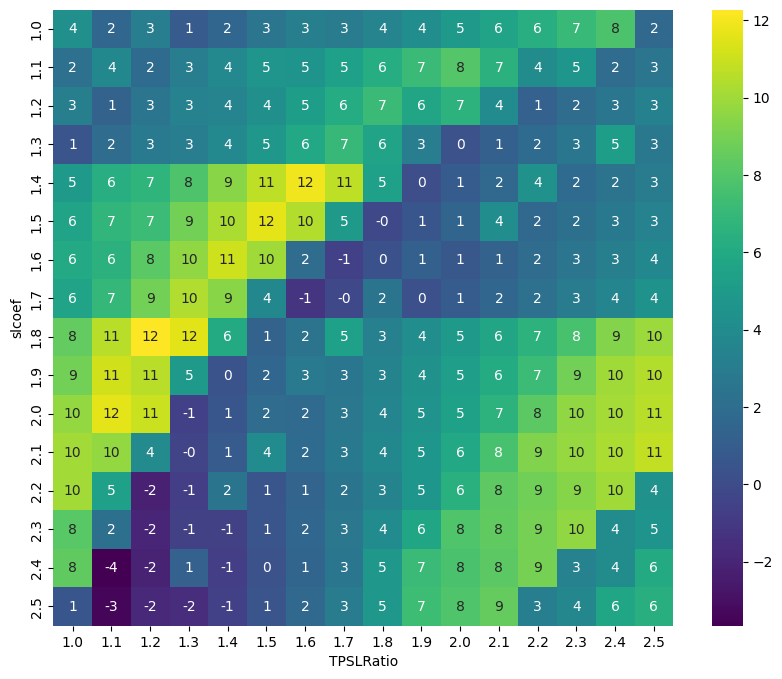

In [64]:
# Convert multiindex series to dataframe
heatmap_df = heatmap.unstack()
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_df, annot=True, cmap='viridis', fmt='.0f')
plt.show()